#Hierachical clustering

##Importing the modules
In this part we import the modules

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import normalize
from sklearn import datasets
import seaborn as sns

##Importing the Data Set
In this part we import the Data Set

In [25]:
from sklearn.datasets import load_wine

###Looking at the importated  Data Set
In this space we import [Wine Data Sets](https://archive.ics.uci.edu/ml/datasets/wine) from UCI Machine Learning Repository. See: https://archive.ics.uci.edu/ml/datasets/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash
4.  Alcalinity of ash
5.  Magnesium
6.  Total phenols
7.  Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


In [26]:
wine=load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

##Preliminary Analysis
Here we see if our data is complete (check if there is any NaN and get rid of them in a suitable way), see the distribution of the feature, and normalize.

Let's see the principal estadistics of the data, such like the minimum, the maximum and the mean. Because those can give us a better way of analyzing the data, and to see in a fast way if there is not something irregural

In [27]:
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names) #feature names considered
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Now we will see if there is any NaN data, and we obtain that this data has No NaN information

In [28]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [29]:
wine_df #date with NaN values in the columns

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


###Normalizing the Data Set

In [30]:
winedf_normal = (wine_df-wine_df.min(axis=0))/(wine_df.max(axis=0)-wine_df.min(axis=0)) #Normalizing the Data
winedf_normal.min(axis=0)
winedf_normal.max(axis=0)
winedf_normal.mean(axis=0)


alcohol                         0.518584
malic_acid                      0.315484
ash                             0.538244
alcalinity_of_ash               0.458502
magnesium                       0.323278
total_phenols                   0.453487
flavanoids                      0.356386
nonflavanoid_phenols            0.437460
proanthocyanins                 0.372523
color_intensity                 0.322363
hue                             0.388170
od280/od315_of_diluted_wines    0.491460
proline                         0.334446
dtype: float64

## Clustering
In this section we pick the model perform the clustering and measure the effectiveness of the model. And because we are looking for a efficient model, we are going to work with the data without normalizing

In [31]:
winedf_x=wine_df.sample(n=40) #showing only 35 wine date sampled will be ploted
winedf_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.680000,0.850,1.56,695.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.730,1.58,695.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.080000,0.920,3.12,365.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.640,1.74,740.0
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.800000,1.230,2.14,428.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.100000,0.610,1.33,425.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.700000,0.660,1.36,560.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.400000,0.700,2.12,372.0
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.600000,1.190,2.48,392.0


###Visualization
In this part we plot the results; dendogram or other we consider to provide insights about results. The plotting should be meaningful, given details of the plotting components (axes label, title, etc).

In [32]:
datavalues = winedf_x.iloc[:,:].values
clus_hierarchical = linkage(datavalues, 'single') # 'single' or 'average' or 'ward'

Here It is important to mention that we call the wines +1, this happen because the index of the dataframe begins with 0 and finishes with 177 , but we want to be more practical and we numbers the wines between 1 and 178.

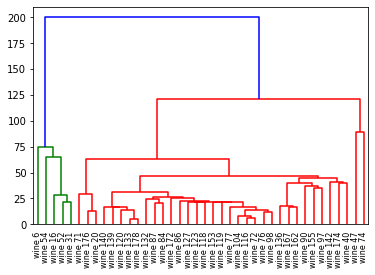

In [33]:
#dendogram of wine
dendrogram= sch.dendrogram(clus_hierarchical,labels=['wine '+ str(i+1) for i in winedf_x.index], leaf_rotation=90)

Here it is important to notice that the "t" depends of where we want to "draw the line"

In [34]:
clustering_t_wine = fcluster(clus_hierarchical, t=3, criterion='maxclust')
print(clustering_t_wine)
winedf_x_copy = winedf_x.copy()
winedf_x_copy['Cluster'] = clustering_t_wine
winedf_x_copy

[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 3 1 1 2 1
 2 2 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.680000,0.850,1.56,695.0,2
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.730,1.58,695.0,2
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.080000,0.920,3.12,365.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.640,1.74,740.0,2
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.800000,1.230,2.14,428.0,2
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.100000,0.610,1.33,425.0,2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530.0,2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.700000,0.660,1.36,560.0,2
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.400000,0.700,2.12,372.0,2
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.600000,1.190,2.48,392.0,2


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)     # the model is created
pca_winefn_df_x = pca.fit_transform(winedf_x)
pca_winefn_df_x_df = pd.DataFrame(data=pca_winefn_df_x, columns=["comp_1", "comp_2"])
pca_names_winefn_df_x = pca_winefn_df_x_df.copy()
pca_names_winefn_df_x["Cluster"] = clustering_t_wine -1
pca_names_winefn_df_x

,comp_1,comp_2,Cluster
0,15.786087,11.038851,1
1,15.429404,-6.275173,1
2,-314.358769,9.000384,1
3,60.437177,-6.048861,1
4,-251.445959,2.087184,1
5,-254.061992,21.734747,1
6,-149.329440,7.219131,1
7,-119.474719,0.829738,1
8,-307.791682,-13.687911,1
9,-287.664018,-8.127473,1


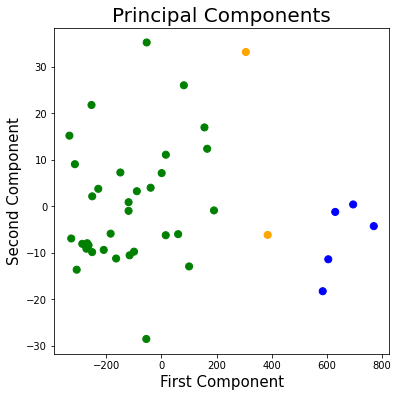

In [36]:
figur = plt.figure(figsize = (6,6));
ax = figur.add_subplot(1,1,1);
ax.set_xlabel("First Component", fontsize=15 );
ax.set_ylabel("Second Component", fontsize=15 );
ax.set_title("Principal Components", fontsize= 20);

color_theme = np.array(['blue','green','orange','red','cyan']);
ax.scatter(x=pca_names_winefn_df_x.comp_1, y=pca_names_winefn_df_x.comp_2, 
                c=color_theme[pca_names_winefn_df_x.Cluster], s=50 );

In [37]:
winedf_x_copy[winedf_x_copy['Cluster']==1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
count,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.0
mean,13.83200,1.72400,2.626000,17.840000,106.800000,2.914000,3.066000,0.308000,1.956000,6.330000,1.17800,2.94800,1337.000000,1.0
std,0.21822,0.15437,0.106677,2.740985,8.927486,0.300383,0.247548,0.063008,0.391701,0.715542,0.09094,0.24964,75.547998,0.0
min,13.63000,1.50000,2.450000,15.200000,94.000000,2.450000,2.790000,0.220000,1.460000,5.600000,1.05000,2.71000,1265.000000,1.0
25%,13.73000,1.65000,2.600000,17.100000,101.000000,2.850000,2.910000,0.290000,1.680000,5.700000,1.13000,2.85000,1285.000000,1.0
50%,13.77000,1.76000,2.680000,17.200000,112.000000,3.000000,2.990000,0.300000,1.970000,6.300000,1.19000,2.88000,1310.000000,1.0
75%,13.83000,1.81000,2.700000,17.200000,112.000000,3.000000,3.250000,0.340000,2.290000,6.750000,1.24000,2.93000,1375.000000,1.0
max,14.20000,1.90000,2.700000,22.500000,115.000000,3.270000,3.390000,0.390000,2.380000,7.300000,1.28000,3.37000,1450.000000,1.0


In [38]:
winedf_x_copy[winedf_x_copy['Cluster']==2].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,12.798182,2.587879,2.321515,20.475758,97.606061,1.943939,1.466061,0.390909,1.357576,4.892121,0.911394,2.276364,558.878788,2.0
std,0.747523,1.181331,0.271502,3.225972,14.269590,0.505933,0.818871,0.131514,0.408580,2.623250,0.269261,0.670200,156.041212,0.0
min,11.030000,0.900000,1.710000,13.200000,70.000000,1.100000,0.480000,0.140000,0.640000,1.280000,0.570000,1.330000,345.000000,2.0
25%,12.290000,1.610000,2.190000,19.000000,86.000000,1.610000,0.690000,0.290000,0.940000,2.620000,0.700000,1.630000,425.000000,2.0
50%,12.770000,2.390000,2.300000,20.000000,96.000000,1.830000,1.280000,0.390000,1.460000,4.800000,0.890000,2.150000,560.000000,2.0
75%,13.360000,3.430000,2.540000,22.800000,104.000000,2.200000,2.030000,0.500000,1.620000,5.880000,1.060000,2.870000,680.000000,2.0
max,14.220000,5.650000,2.750000,26.500000,134.000000,3.000000,3.150000,0.630000,2.080000,10.680000,1.710000,3.530000,870.000000,2.0


In [39]:
winedf_x_copy[winedf_x_copy['Cluster']==3].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,13.685000,2.630000,2.440000,23.000000,120.500000,3.275000,3.03000,0.240000,2.075000,4.125000,1.175000,3.470000,1025.000000,3.0
std,0.982878,1.357645,0.226274,9.899495,26.162951,0.035355,0.19799,0.042426,0.162635,1.096016,0.190919,0.042426,56.568542,0.0
min,12.990000,1.670000,2.280000,16.000000,102.000000,3.250000,2.89000,0.210000,1.960000,3.350000,1.040000,3.440000,985.000000,3.0
25%,13.337500,2.150000,2.360000,19.500000,111.250000,3.262500,2.96000,0.225000,2.017500,3.737500,1.107500,3.455000,1005.000000,3.0
50%,13.685000,2.630000,2.440000,23.000000,120.500000,3.275000,3.03000,0.240000,2.075000,4.125000,1.175000,3.470000,1025.000000,3.0
75%,14.032500,3.110000,2.520000,26.500000,129.750000,3.287500,3.10000,0.255000,2.132500,4.512500,1.242500,3.485000,1045.000000,3.0
max,14.380000,3.590000,2.600000,30.000000,139.000000,3.300000,3.17000,0.270000,2.190000,4.900000,1.310000,3.500000,1065.000000,3.0


## Observation

The first observation we make is that as such for this method we have only used a reduced amount of data, this because as the name says, it is a hierarchical method, which implies many iterations, so since we do not high computational power we decided for this assignment to use 40 data chosen in a random way by the sample function. 

Now, since we use the sample function each time you compile the code you will have different results. The observations written here are made with the data obtained in the last compilation before sending the assigment. When this file was uploaded we made a compilation of the code and obtained the following dendogram.

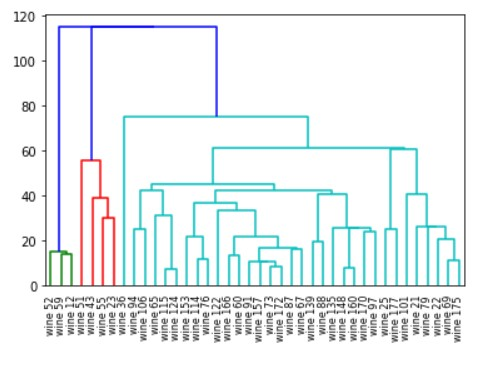 

That is to say that it was separated into 3 clusters

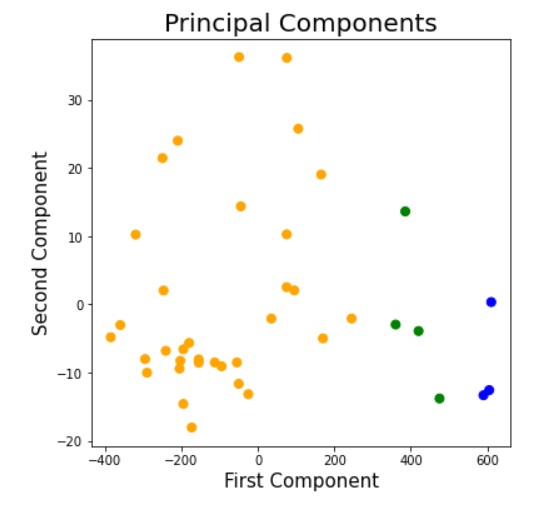

Looking at the details of each cluster we can see that the category which has the lowest standard deviation in all clusters is "nonflavanoid_phenols", which could mean that this category has a great weight when classifying this dataset, even more when we notice that within each cluster, this category has the lowest standard deviation among the other categories. Another noteworthy observation is that the most dispersed category within each cluster is "proline", which could mean that it does not have so much weight when grouping the data, but we cannot fail to take into account that this category has high numerical values.

Remarks on the Hierarchical model, we must be very careful when choosing the "t" to "draw the line" in the dendogram as this will help us to determine the number of clusters, for this reason we worked with unnormalised data because having normalised data tends to be closer which causes inconveniences when determining by human eye where we want and we can draw the line correctly.

It is also important to note that the computational complexity of the Hierarchical method is of order $\mathcal{O}(n^{3})$, where $n$ is the number of data we are working with and for special cases we can reduce the runtime to $\mathcal{O}(n^{2})$ or even $\mathcal{O}(n^{2}\log n)$. This is the reason why we are taking a sample size $n=40$, to mitigate the runtime while using the dendogram. Note that an implementation using dynamic programming should allow us to reduce the quadratic runtime.

Another feature that we can see in the Hierarchical method is the visual advantage that the dendogram allows us and moreover, the opportunity to use different metrics to perform the dendogram and thus apply it to the method; this is something that other clustering methods do not offer.

Finally, we can see that our analysis allowed us to find interesting clusters. Moreover, this allows further studies on the analysis of each cluster considering other distances and seeing how these perturb the clusters. Other features that should also be taken into account are the presence of outliers in our data analysis. For future work, this is something that can be addressed using other techniques such as regression.


##Extras
In this part we are using the affinity propagation method, for the solve the same problem.

The affinity propagation (AP) is a clustering method and it is based on the concept of sending messages between a pair of points until they converge.These messages are a way of measuring how similar these two points are to each other and whether or not they can be prototypes of each other. This algorithm also has the advantage that it finds the number of clusters by itself as we can see in the application below. The problem is that this implies a high computational complexity (one could try to apply this method by dynamic programming) with order $\mathcal{O}(n^{2}m)$ where $n$ is the sample size and $m$ is the number of iterations we are asking the machine to do until convergence is reached. One of the advantages of AP is the lack of sensitivity to the criteria that allow the initialisation of the model. So the idea is that AP takes as input similarity measures between pairs of data points, and simultaneously considers all data points as potential prototypes. 

In [40]:
#importing the library
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

It is the corelation matrix: 
           0         1         2         3         4         5         6   \
0   1.000000  0.094397  0.211545 -0.310235  0.270798  0.289101  0.236815   
1   0.094397  1.000000  0.164045  0.288500 -0.054575 -0.335167 -0.411007   
2   0.211545  0.164045  1.000000  0.443367  0.286587  0.128980  0.115077   
3  -0.310235  0.288500  0.443367  1.000000 -0.083333 -0.321113 -0.351370   
4   0.270798 -0.054575  0.286587 -0.083333  1.000000  0.214401  0.195784   
5   0.289101 -0.335167  0.128980 -0.321113  0.214401  1.000000  0.864564   
6   0.236815 -0.411007  0.115077 -0.351370  0.195784  0.864564  1.000000   
7  -0.155929  0.292977  0.186230  0.361922 -0.256294 -0.449935 -0.537900   
8   0.136698 -0.220746  0.009652 -0.197327  0.236441  0.612413  0.652692   
9   0.546364  0.248985  0.258887  0.018732  0.199950 -0.055136 -0.172379   
10 -0.071747 -0.561296 -0.074667 -0.273955  0.055398  0.433681  0.543479   
11  0.072343 -0.368710  0.003911 -0.276769  0.066004  0.6

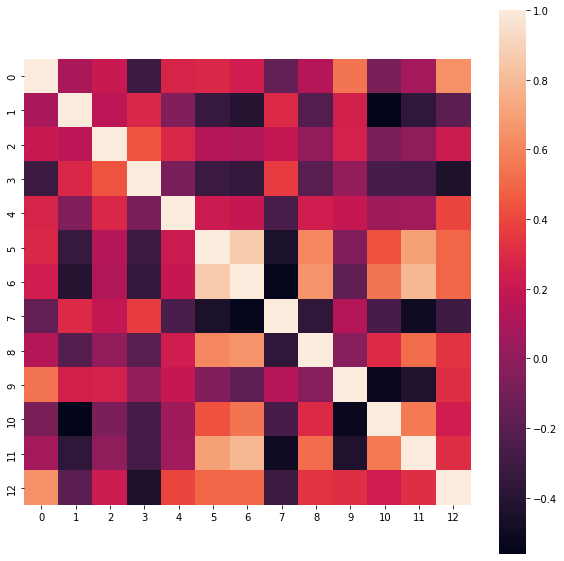

Viewing the corelation 
: None


In [41]:
#setting the data wine and viewing the corelation 
X = wine.data 
data = pd.DataFrame(X)
corelation = data.corr()
print("It is the corelation matrix: \n", corelation)
fig = plt.figure(figsize=(10,10));
sns.heatmap(corelation, square = True);
print("Viewing the corelation \n:",plt.show())

In [42]:
#normalizing the data
scaler_wine = StandardScaler()
X_std = scaler_wine.fit_transform(X)

In [43]:
#training the model
clt = AffinityPropagation(damping=0.5, max_iter=500, affinity="euclidean").fit(winedf_normal)
clt.labels_

array([ 4,  2,  3,  1,  0,  1,  2,  3,  2,  4,  1,  2,  2,  1,  1,  2,  1,
        1,  1,  4,  4,  3,  3,  3,  3,  0,  2,  2,  3,  3,  2,  2,  2,  0,
        3,  3,  0,  2,  2,  4,  4,  3,  4,  0,  3,  3,  4,  4,  2,  1,  2,
        2,  1,  1,  4,  3,  4,  2,  1,  5,  5,  5,  8,  8,  7,  8,  8,  8,
        5,  6, 11,  3, 10,  3,  3,  8,  8,  7,  6,  0,  8,  8,  7, 13,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  8,  8,  6, 11,  8,  8,  8,  8,  8,
       10, 10, 10,  7, 10,  7, 10, 10,  9, 10,  7,  7, 10,  7, 10, 10,  5,
       10, 10,  0,  0,  9,  9, 10, 10,  7, 10,  7, 11, 11, 11, 11,  5, 13,
       13, 13, 13, 13, 13, 12, 13, 13, 11, 12, 12, 12, 12, 12, 11, 11, 11,
       12, 12, 12, 12, 13, 12, 12, 12, 13, 13, 11, 12, 12, 12, 12, 12, 12,
       11, 12, 12, 12, 12, 12, 12, 12])

In [44]:
#predicting the clusters
model = clt.fit(X_std)
n_clusters = len(model.cluster_centers_indices_)
print("Number of Clusters: ",n_clusters)

Number of Clusters:  14


In [45]:
#training the model
clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters

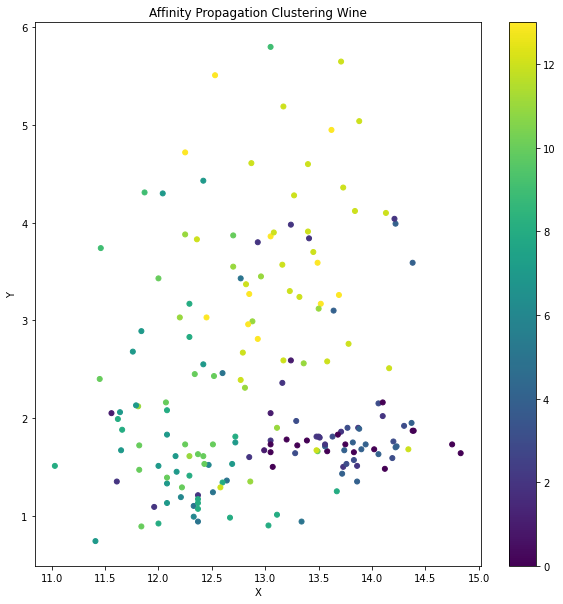

In [46]:
#visualizing the cluster done by Affinity ´Propagation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=25)
ax.set_title("Affinity Propagation Clustering Wine")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.colorbar(scatter)
plt.show()

It is interesting to note that the AP method finds $14$ potential clusterings, which makes us wonder if these groups can be found with the Hierarchical method. It is quite certain that the AP method is the best application for this dataset. This is something that can be contrasted with the results obtained above.